In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.manifold import TSNE


In [2]:
def balance_dataset(df, disease = "Pneumonia", percentage = 1, vindr_samples = False):
    # get value count of df.disease and balance based on lowest value
    value_count = df[disease].value_counts()
    if not vindr_samples:
        minority_count = int(value_count.min()*percentage)
    else:
        vindr_split = {0.01: 6, 0.1: 74, 0.5:372, 0.8: 594, 1.0: 744}
        minority_count = int(vindr_split[percentage]/2)
        
    df_class_0 = df[df[disease] == 0].sample(minority_count, random_state=42)
    df_class_1 = df[df[disease] == 1].sample(minority_count, random_state=42)
    df_balanced = pd.concat([df_class_0, df_class_1])
    # reset index
    df_balanced = df_balanced.reset_index(drop=True)
    return df_balanced
def prepare_data(df, dataset_name="Train"):
    features = np.vstack(df[df.columns[-1024:]].values)
    labels = df["Pneumonia"].values
    # print number of samples
    print(f"{dataset_name} samples: {len(labels)}")
    return features, labels

In [3]:
PATH_TO_DATA = "/mnt/data2/datasets_lfay/MedImageInsights/data"


In [91]:
# Training data 
data_mimic = os.path.join(PATH_TO_DATA, "MIMIC-v1.0-512", "train.csv")
df_mimic = pd.read_csv(data_mimic)
df_train_mimic = df_mimic[(df_mimic["No Finding"] == 1) | (df_mimic["Pneumonia"] == 1)]
df_train_mimic = balance_dataset(df_train_mimic, "Pneumonia", 1, True)

data_cheXpert = os.path.join(PATH_TO_DATA, "CheXpert-v1.0-512", "train.csv")
df_cheXpert = pd.read_csv(data_cheXpert)
df_train_cheXpert = df_cheXpert[(df_cheXpert["No Finding"] == 1) | (df_cheXpert["Pneumonia"] == 1)]
df_train_cheXpert = balance_dataset(df_train_cheXpert, "Pneumonia", 1, True)

data_vindr = os.path.join(PATH_TO_DATA,  "vindr-pcxr", "train.csv")
df_vindr = pd.read_csv(data_vindr)
df_train_vindr = df_vindr[(df_vindr["No Finding"] == 1) | (df_vindr["Pneumonia"] == 1)]
df_train_vindr = balance_dataset(df_train_vindr, "Pneumonia", 1, True)

print("MIMIC: ", df_train_mimic["Pneumonia"].value_counts())
print("CheXpert: ", df_train_cheXpert["Pneumonia"].value_counts())
print("VinDr: ", df_train_vindr["Pneumonia"].value_counts())



MIMIC:  Pneumonia
0.0    372
1.0    372
Name: count, dtype: int64
CheXpert:  Pneumonia
0.0    372
1.0    372
Name: count, dtype: int64
VinDr:  Pneumonia
0.0    372
1.0    372
Name: count, dtype: int64


In [92]:
test_features_mimic, test_labels_mimic = prepare_data(df_train_mimic, "MIMIC")
test_features_chexpert, test_labels_chexpert = prepare_data(df_train_cheXpert, "CheXpert")
test_features_vindr, test_labels_vindr = prepare_data(df_train_vindr, "vindr")

MIMIC samples: 744
CheXpert samples: 744
vindr samples: 744


In [ ]:
# tsne = TSNE(n_components=2, random_state=42)
# X_embedded_mimic = tsne.fit_transform(test_features_mimic)
# X_embedded_chexpert = tsne.fit_transform(test_features_chexpert)
# X_embedded_vindr = tsne.fit_transform(test_features_vindr)

/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
# # create df from X_embedded_mimic dim1 and dim2 as columns
# df_mimic_tsne = pd.DataFrame(X_embedded_mimic, columns=["dim1", "dim2"])
# colors_mimic = ["#016895","#016895"]

# df_chexpet_tsne = pd.DataFrame(X_embedded_chexpert, columns=["dim1", "dim2"])
# colors_chexpert = ["#6FA287","#016895"]

# df_vindr_tsne = pd.DataFrame(X_embedded_vindr, columns=["dim1", "dim2"])
# colors_vindr = ["#734675","#016895"]

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# Combine all features and labels
all_features = np.vstack([test_features_mimic, test_features_chexpert, test_features_vindr])
all_labels = (["MIMIC"] * len(test_features_mimic) +
              ["CheXpert"] * len(test_features_chexpert) +
              ["VinDr-PCXR"] * len(test_features_vindr))
# add pneumonia labels


# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(all_features)

# Create DataFrame
df_tsne = pd.DataFrame(X_embedded, columns=["dim1", "dim2"])
df_tsne["Dataset"] = all_labels

# Subsample for balanced comparison
# n_samples = min(df_tsne["Dataset"].value_counts())
# df_tsne_train = df_tsne.groupby("Dataset").sample(n=n_samples, random_state=42)
df_tsne_train = df_tsne.copy()


/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


NameError: name 'df_tnse' is not defined

In [94]:
df_tsne_train = df_tsne.copy()


In [95]:
all_pneumonia = (df_train_mimic.Pneumonia.values.tolist() + df_train_cheXpert.Pneumonia.values.tolist() + df_train_vindr.Pneumonia.values.tolist())
df_tsne_train["Pneumonia"] = all_pneumonia

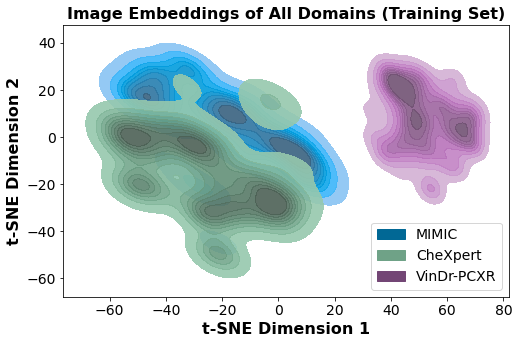

In [96]:

# Plot with KDE
palette = {"MIMIC": "#016895", "CheXpert": "#6FA287", "VinDr-PCXR": "#734675"}
fig, ax = plt.subplots(figsize=(8, 5))

for dataset, color in palette.items():
    sns.kdeplot(data=df_tsne_train[df_tsne_train["Dataset"] == dataset],
                x="dim1", y="dim2",
                color=color, fill=True, bw_adjust=0.9, alpha=0.9,
                label=dataset)

# Add legend
handles = [mpatches.Patch(color=color, label=dataset) for dataset, color in palette.items()]
# lower right
plt.legend(handles=handles, fontsize=14, loc="lower right")

# Customize plot
plt.xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
plt.ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
plt.title("Image Embeddings of All Domains (Training Set)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


372 372


372 372
372 372


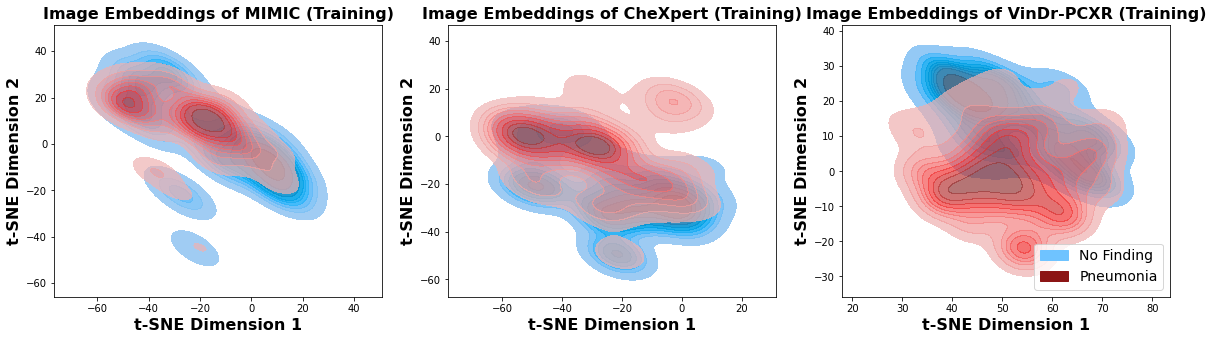

In [97]:

# Plot with KDE
datasets = {"MIMIC": "#016895", "CheXpert": "#6FA287", "VinDr-PCXR": "#734675"}
palette = {"No Finding": "#6FC3FF", "Pneumonia": "#8C1515"}
fig, ax = plt.subplots(1,3, figsize=(20,5))
axs = ax.ravel()
i = -1
for dataset, color in datasets.items():
    i += 1
    data_1 = df_tsne_train[(df_tsne_train["Dataset"] == dataset) & (df_tsne_train["Pneumonia"] == 1)]
    data_0 = df_tsne_train[(df_tsne_train["Dataset"] == dataset) & (df_tsne_train["Pneumonia"] == 0)]
    print(len(data_1), len(data_0))
    
    sns.kdeplot(data=data_0, x="dim1", y="dim2", color=palette["No Finding"], fill=True, bw_adjust=0.9, alpha=0.9, label="No Finding", ax=axs[i])
    sns.kdeplot(data=data_1, x="dim1", y="dim2", color=palette["Pneumonia"], fill=True, bw_adjust=0.9, alpha=0.7, label="Pneumonia", ax=axs[i])
    
    axs[i].set_xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
    axs[i].set_ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
    axs[i].set_title(f"Image Embeddings of {dataset} (Training)", fontsize=16, fontweight='bold')

    # Add legend
    handles = [mpatches.Patch(color=color, label=dataset) for dataset, color in palette.items()]
    # lower right
    plt.legend(handles=handles, fontsize=14, loc="lower right")

    # Customize plot
    # plt.xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
    # plt.ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
    # plt.title(f"Image Embeddings of {dataset} (Training Set)", fontsize=16, fontweight='bold')
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)
    # #plt.show()


In [98]:
# Test data
data_mimic = os.path.join(PATH_TO_DATA, "MIMIC-v1.0-512", "test.csv")
data_cheXpert = os.path.join(PATH_TO_DATA, "CheXpert-v1.0-512", "test.csv")
data_vindr = os.path.join(PATH_TO_DATA, "vindr-pcxr", "test.csv")

df_mimic = pd.read_csv(data_mimic)
df_chexpert = pd.read_csv(data_cheXpert)
df_vindr = pd.read_csv(data_vindr)

df_mimic = balance_dataset(df_mimic, "Pneumonia")
df_chexpert = balance_dataset(df_chexpert, "Pneumonia")
df_vindr = balance_dataset(df_vindr, "Pneumonia")
print("MIMIC: ", df_mimic["Pneumonia"].value_counts())
print("CheXpert: ", df_chexpert["Pneumonia"].value_counts())
print("vindr: ", df_vindr["Pneumonia"].value_counts())

MIMIC:  Pneumonia
0.0    4093
1.0    4093
Name: count, dtype: int64
CheXpert:  Pneumonia
0.0    1254
1.0    1254
Name: count, dtype: int64
vindr:  Pneumonia
0.0    89
1.0    89
Name: count, dtype: int64


In [99]:
test_features_mimic, test_labels_mimic = prepare_data(df_mimic, "MIMIC")
test_features_chexpert, test_labels_chexpert = prepare_data(df_chexpert, "CheXpert")
test_features_vindr, test_labels_vindr = prepare_data(df_vindr, "vindr")



MIMIC samples: 8186
CheXpert samples: 2508
vindr samples: 178


In [100]:
# Combine all features and labels
all_features = np.vstack([test_features_mimic, test_features_chexpert, test_features_vindr])
all_labels = (["MIMIC"] * len(test_features_mimic) +
              ["CheXpert"] * len(test_features_chexpert) +
              ["VinDr-PCXR"] * len(test_features_vindr))

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(all_features)

# Create DataFrame
df_tsne = pd.DataFrame(X_embedded, columns=["dim1", "dim2"])
df_tsne["Dataset"] = all_labels


/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [101]:
all_pneumonia = (df_mimic.Pneumonia.values.tolist() + df_chexpert.Pneumonia.values.tolist() + df_vindr.Pneumonia.values.tolist())
df_tsne["Pneumonia"] = all_pneumonia

# Subsample for balanced comparison
# n_samples = min(df_tsne["Dataset"].value_counts())
df_tsne_test = df_tsne.copy()


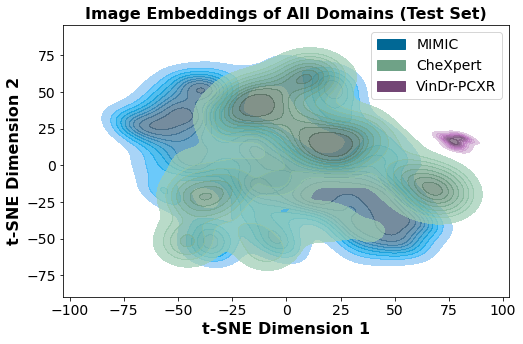

In [102]:

# Plot with KDE
palette = {"MIMIC": "#016895", "CheXpert": "#6FA287", "VinDr-PCXR": "#734675"}
fig, ax = plt.subplots(figsize=(8, 5))

for dataset, color in palette.items():
    sns.kdeplot(data=df_tsne_test[df_tsne_test["Dataset"] == dataset],
                x="dim1", y="dim2",
                color=color, fill=True, bw_adjust=0.9, alpha=0.7,
                label=dataset)

# Add legend
handles = [mpatches.Patch(color=color, label=dataset) for dataset, color in palette.items()]
plt.legend(handles=handles, fontsize=14)

# Customize plot
plt.xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
plt.ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
plt.title("Image Embeddings of All Domains (Test Set)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


MIMIC
4093 4093


CheXpert
1254 1254
VinDr-PCXR
89 89


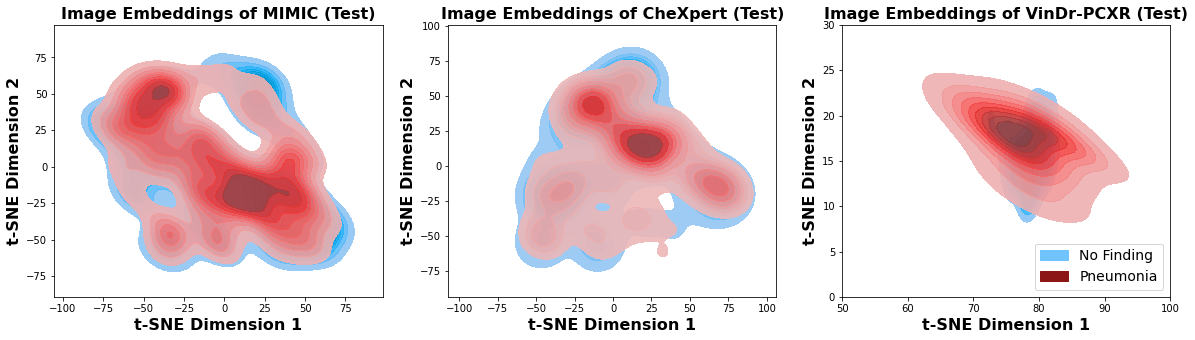

In [105]:

# Plot with KDE
datasets = {"MIMIC": "#016895", "CheXpert": "#6FA287", "VinDr-PCXR": "#734675"}
palette = {"No Finding": "#6FC3FF", "Pneumonia": "#8C1515"}
fig, ax = plt.subplots(1,3, figsize=(20,5))
axs = ax.ravel()
i = -1
for dataset, color in datasets.items():
    i += 1
    print(dataset)
    data_1 = df_tsne_test[(df_tsne_test["Dataset"] == dataset) & df_tsne_test["Pneumonia"] == 1]
    data_0 = df_tsne_test[(df_tsne_test["Dataset"] == dataset) & (df_tsne_test["Pneumonia"] != 1)]

    print(len(data_1), len(data_0))
    
    sns.kdeplot(data=data_0, x="dim1", y="dim2", color=palette["No Finding"], fill=True, bw_adjust=0.9, alpha=0.9, label="No Finding", ax=axs[i])
    sns.kdeplot(data=data_1, x="dim1", y="dim2", color=palette["Pneumonia"], fill=True, bw_adjust=0.9, alpha=0.9, label="Pneumonia", ax=axs[i])
    
    axs[i].set_xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
    axs[i].set_ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
    axs[i].set_title(f"Image Embeddings of {dataset} (Test)", fontsize=16, fontweight='bold')

    if dataset == "VinDr-PCXR":
        axs[i].set_xlim(50, 100)
        axs[i].set_ylim(0, 30)

    # Add legend
    handles = [mpatches.Patch(color=color, label=dataset) for dataset, color in palette.items()]
    # lower right
    plt.legend(handles=handles, fontsize=14, loc="lower right")

    # Customize plot
    # plt.xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
    # plt.ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
    # plt.title(f"Image Embeddings of {dataset} (Training Set)", fontsize=16, fontweight='bold')
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)
    # #plt.show()


In [7]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded_mimic = tsne.fit_transform(test_features_mimic)
X_embedded_chexpert = tsne.fit_transform(test_features_chexpert)
X_embedded_vindr = tsne.fit_transform(test_features_vindr)

/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lfay/.local/lib/python3.8/site-packages/sklearn/manifold/_t_

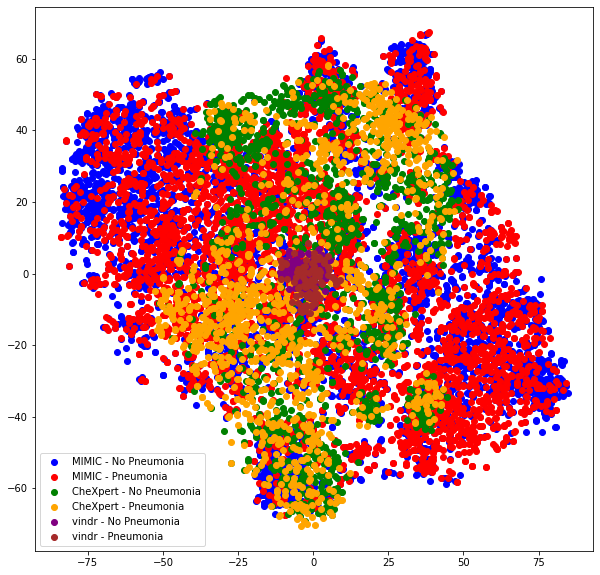

In [8]:
# plot all in one plot
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded_mimic[test_labels_mimic == 0, 0], X_embedded_mimic[test_labels_mimic == 0, 1], color="blue", label="MIMIC - No Pneumonia")
plt.scatter(X_embedded_mimic[test_labels_mimic == 1, 0], X_embedded_mimic[test_labels_mimic == 1, 1], color="red", label="MIMIC - Pneumonia")
plt.scatter(X_embedded_chexpert[test_labels_chexpert == 0, 0], X_embedded_chexpert[test_labels_chexpert == 0, 1], color="green", label="CheXpert - No Pneumonia")
plt.scatter(X_embedded_chexpert[test_labels_chexpert == 1, 0], X_embedded_chexpert[test_labels_chexpert == 1, 1], color="orange", label="CheXpert - Pneumonia")
plt.scatter(X_embedded_vindr[test_labels_vindr == 0, 0], X_embedded_vindr[test_labels_vindr == 0, 1], color="purple", label="vindr - No Pneumonia")
plt.scatter(X_embedded_vindr[test_labels_vindr == 1, 0], X_embedded_vindr[test_labels_vindr == 1, 1], color="brown", label="vindr - Pneumonia")
plt.legend()


In [9]:
# create df from X_embedded_mimic dim1 and dim2 as columns
df_mimic_tsne = pd.DataFrame(X_embedded_mimic, columns=["dim1", "dim2"])
colors_mimic = ["#016895","#016895"]

df_chexpet_tsne = pd.DataFrame(X_embedded_chexpert, columns=["dim1", "dim2"])
colors_chexpert = ["#6FA287","#016895"]

df_vindr_tsne = pd.DataFrame(X_embedded_vindr, columns=["dim1", "dim2"])
colors_vindr = ["#734675","#016895"]

In [9]:
from matplotlib import gridspec

import matplotlib.patches as  mpatches


Text(0.5, 1.0, 'Image Embeddings of All Domains')

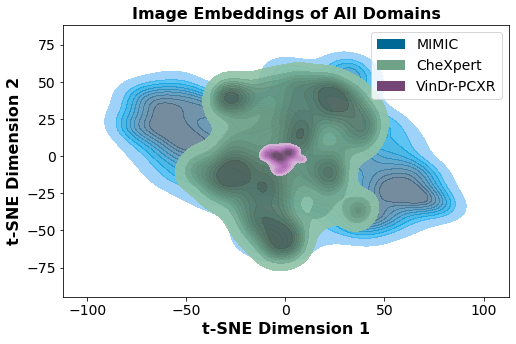

In [51]:
# plot all in one plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(df_mimic_tsne, x="dim1", y="dim2", color=colors_mimic[0],fill=True, alpha = 0.7, legend=True, label= "MIMIC")
sns.kdeplot(df_chexpet_tsne, x="dim1", y="dim2", color=colors_chexpert[0],fill=True, bw_adjust=.9, alpha = 0.9, legend=True, label= "CheXpert")
sns.kdeplot(df_vindr_tsne, x="dim1", y="dim2", color=colors_vindr[0],fill=True, bw_adjust=.9, alpha = 1, legend=True, label= "VinDr-PCXR")
handles = [mpatches.Patch(facecolor=colors_mimic[0], label="MIMIC"),
           mpatches.Patch(facecolor=colors_chexpert[0], label="CheXpert"),
              mpatches.Patch(facecolor=colors_vindr[0], label="VinDr-PCXR")]
plt.legend(handles=handles, fontsize=14)

plt.xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
plt.ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Image Embeddings of All Domains", fontsize=16, fontweight='bold')


In [13]:
# create df from X_embedded_mimic dim1 and dim2 as columns
df_mimic_tsne = pd.DataFrame(X_embedded_mimic, columns=["dim1", "dim2"])
# add Pneumonia column
df_mimic_tsne["Pneumonia"] = test_labels_mimic

colors_mimic = ["#016895","#016895"]

df_chexpet_tsne = pd.DataFrame(X_embedded_chexpert, columns=["dim1", "dim2"])
df_chexpet_tsne["Pneumonia"] = test_labels_chexpert
colors_chexpert = ["#6FA287","#016895"]

df_vindr_tsne = pd.DataFrame(X_embedded_vindr, columns=["dim1", "dim2"])
df_vindr_tsne["Pneumonia"] = test_labels_vindr
colors_vindr = ["#734675","#016895"]


Text(0.5, 1.0, 'Image Embeddings of All Domains')

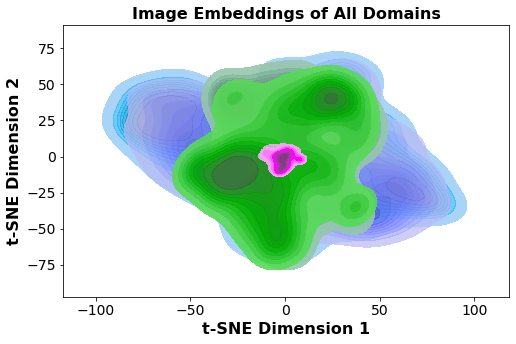

In [22]:
# plot all in one plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(df_mimic_tsne[df_mimic_tsne["Pneumonia"]==0], x="dim1", y="dim2", color=colors_mimic[0],fill=True, alpha = 0.7, legend=True, label= "MIMIC - No Pneumonia")
sns.kdeplot(df_mimic_tsne[df_mimic_tsne["Pneumonia"]==1], x="dim1", y="dim2", color="darkblue",fill=True, alpha = 0.7, legend=True, label= "MIMIC - Pneumonia")

sns.kdeplot(df_chexpet_tsne[df_chexpet_tsne["Pneumonia"]==0], x="dim1", y="dim2", color=colors_chexpert[0],fill=True, bw_adjust=.9, alpha = 0.9, legend=True, label= "CheXpert - No Pneumonia")
sns.kdeplot(df_chexpet_tsne[df_chexpet_tsne["Pneumonia"]==1], x="dim1", y="dim2", color="Green",fill=True, bw_adjust=.9, alpha = 0.9, legend=True, label= "CheXpert - Pneumonia")

sns.kdeplot(df_vindr_tsne[df_vindr_tsne["Pneumonia"]==0], x="dim1", y="dim2", color=colors_vindr[0],fill=True, bw_adjust=.9, alpha = 1, legend=True, label= "VinDr-PCXR - No Pneumonia")
sns.kdeplot(df_vindr_tsne[df_vindr_tsne["Pneumonia"]==1], x="dim1", y="dim2", color="purple",fill=True, bw_adjust=.9, alpha = 1, legend=True, label= "VinDr-PCXR - Pneumonia")

handles = [mpatches.Patch(facecolor=colors_mimic[0], label="MIMIC - No Pneumonia"),
             mpatches.Patch(facecolor="darkblue", label="MIMIC - Pneumonia"),
             mpatches.Patch(facecolor=colors_chexpert[0], label="CheXpert - No Pneumonia"),
               mpatches.Patch(facecolor="Green", label="CheXpert - Pneumonia"),
               mpatches.Patch(facecolor=colors_vindr[0], label="VinDr-PCXR - No Pneumonia"),
               mpatches.Patch(facecolor="purple", label="VinDr-PCXR - Pneumonia")]
#plt.legend(handles=handles, fontsize=14, loc='upper right')

plt.xlabel("t-SNE Dimension 1", fontsize=16, fontweight='bold')
plt.ylabel("t-SNE Dimension 2", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Image Embeddings of All Domains", fontsize=16, fontweight='bold')


<AxesSubplot:xlabel='dim1', ylabel='dim2'>

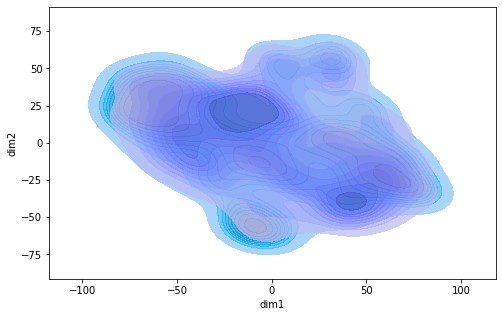

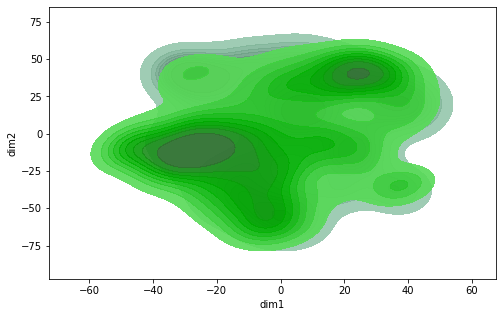

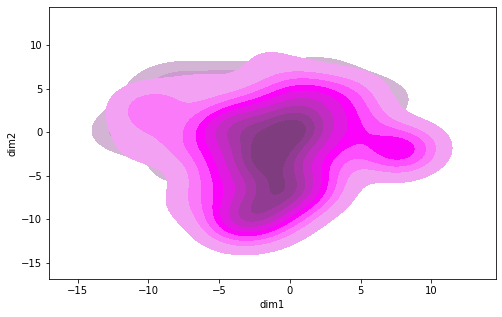

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(df_mimic_tsne[df_mimic_tsne["Pneumonia"]==0], x="dim1", y="dim2", color=colors_mimic[0],fill=True, alpha = 0.7, legend=True, label= "MIMIC - No Pneumonia")
sns.kdeplot(df_mimic_tsne[df_mimic_tsne["Pneumonia"]==1], x="dim1", y="dim2", color="darkblue",fill=True, alpha = 0.7, legend=True, label= "MIMIC - Pneumonia")

fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(df_chexpet_tsne[df_chexpet_tsne["Pneumonia"]==0], x="dim1", y="dim2", color=colors_chexpert[0],fill=True, bw_adjust=.9, alpha = 0.9, legend=True, label= "CheXpert - No Pneumonia")
sns.kdeplot(df_chexpet_tsne[df_chexpet_tsne["Pneumonia"]==1], x="dim1", y="dim2", color="Green",fill=True, bw_adjust=.9, alpha = 0.9, legend=True, label= "CheXpert - Pneumonia")

fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(df_vindr_tsne[df_vindr_tsne["Pneumonia"]==0], x="dim1", y="dim2", color=colors_vindr[0],fill=True, bw_adjust=.9, alpha = 1, legend=True, label= "VinDr-PCXR - No Pneumonia")
sns.kdeplot(df_vindr_tsne[df_vindr_tsne["Pneumonia"]==1], x="dim1", y="dim2", color="purple",fill=True, bw_adjust=.9, alpha = 1, legend=True, label= "VinDr-PCXR - Pneumonia")

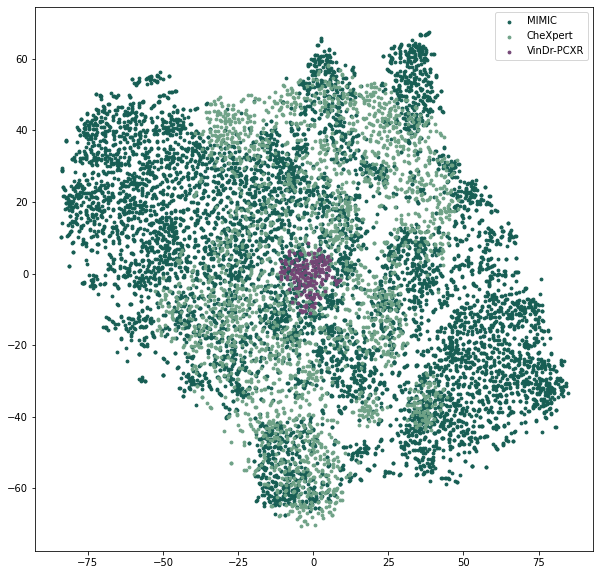

In [21]:
# plot all in one plot
plt.figure(figsize=(10, 10))
sns.scatter(X_embedded_mimic[:, 0], X_embedded_mimic[:, 1], color="#175E54", label="MIMIC", s=8)
plt.scatter(X_embedded_chexpert[:, 0], X_embedded_chexpert[:, 1], color="#6FA287", label="CheXpert", s=8)
plt.scatter(X_embedded_vindr[:, 0], X_embedded_vindr[:, 1], color="#734675", label="VinDr-PCXR", s=8)
plt.legend()